In [12]:
# Imports:
import pandas as pd
import numpy as np

# Importing the needed modules
from tensorflow import keras
from tensorflow.keras import Model, Input
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Concatenate, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2, L1L2
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.initializers import TruncatedNormal

# Usefull functions from tensorflow_docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# importing data
X_train = pd.read_csv('./data/imputed_feature_columns.csv')
X_test = pd.read_csv('./data/imputed_feature_columns_test.csv')
y = pd.read_csv('./data/SalePrice.csv')

In [2]:
# Model 01

In = Input(shape=(len(X_train.columns)))

dense11 = Dense(64, activation='elu', 
              kernel_regularizer=l1(0.001),
              bias_regularizer=l2(0.001),
              bias_initializer=TruncatedNormal(mean=0, stddev=0.005),
              kernel_initializer=TruncatedNormal(mean=0, stddev=25)
        )(In)

dense12 = Dense(256, 
              kernel_regularizer=l2(0.01),
              bias_regularizer=l1(0.01),
              bias_initializer=TruncatedNormal(mean=0, stddev=0.5),
              kernel_initializer=TruncatedNormal(mean=0, stddev=5)
        )(dense11)
norm11 = BatchNormalization()(dense12)

dense13 = Dense(64, activation='elu',
              bias_regularizer=l1(0.001), 
              kernel_regularizer=l2(0.001),
              bias_initializer=TruncatedNormal(mean=0, stddev=0.005),
              kernel_initializer=TruncatedNormal(mean=0, stddev=25)
        )(norm11)        
norm12 = BatchNormalization()(dense13)

dense14 = Dense(128, activation = 'relu', 
              bias_regularizer=l1(0.001), 
              kernel_regularizer=l1(0.001),
              bias_initializer=TruncatedNormal(mean=0, stddev=1.5),
              kernel_initializer=TruncatedNormal(mean=0, stddev=1)
        )(norm12)

dense15 = Dense(512, 
              kernel_regularizer=l2(0.01),
              bias_regularizer=l1(0.01), 
              bias_initializer=TruncatedNormal(mean=0, stddev=1.5),
              kernel_initializer=TruncatedNormal(mean=0, stddev=5)
        )(dense14)
norm13 = BatchNormalization()(dense15)

dense16 = Dense(128, activation = 'elu',
              kernel_regularizer=l2(0.01),
              bias_regularizer=l1(0.001), 
              bias_initializer=TruncatedNormal(mean=0, stddev=1),
              kernel_initializer=TruncatedNormal(mean=0, stddev=1)
        )(norm13)
norm14 = BatchNormalization()(dense16)

dense17 = Dense(8,  activation = 'elu',
              kernel_regularizer=l1(0.001),
              bias_regularizer=l1(0.001),
              bias_initializer=TruncatedNormal(mean=0, stddev=1),
              kernel_initializer=TruncatedNormal(mean=0, stddev=1.75)
        )(norm14)

dense18 = Dense(32,
              kernel_regularizer=l2(0.01), 
              bias_regularizer=l1(0.01), 
              bias_initializer=TruncatedNormal(mean=0, stddev=1.5),
              kernel_initializer=TruncatedNormal(mean=0, stddev=4)  
        )(dense17)
norm15 = BatchNormalization()(dense18)

dense19 = Dense(8, activation = 'elu',
              kernel_regularizer=l1(0.001),
              bias_regularizer=l1(0.001),
              bias_initializer=TruncatedNormal(mean=0, stddev=1),
              kernel_initializer=TruncatedNormal(mean=0, stddev=1.75)
        )(norm15)
norm16 = BatchNormalization()(dense19)

dense110 = Dense(128, 
              activation = 'elu',
              kernel_regularizer=l1(0.001),
              bias_regularizer=l1(0.001),
              bias_initializer=TruncatedNormal(mean=0, stddev=1.8),
              kernel_initializer=TruncatedNormal(mean=0, stddev=2.5)
        )(norm16)

dense111 = Dense(1024, 
              kernel_regularizer=l2(0.01), 
              bias_regularizer=l1(0.01), 
              bias_initializer=TruncatedNormal(mean=0, stddev=0.5),
              kernel_initializer=TruncatedNormal(mean=0, stddev=6)
        )(dense110)
drop11 = Dropout(0.5)(dense111)
norm17 = BatchNormalization()(drop11)

dense112 = Dense(128, 
              activation = 'elu', 
              bias_regularizer=l1(0.001),
              bias_initializer=TruncatedNormal(mean=0, stddev=1.8),
              kernel_initializer=TruncatedNormal(mean=0, stddev=2.5),
              kernel_regularizer=l2(0.001)
        )(norm17)
        
dense113 = Dense(4, 
              kernel_regularizer=L1L2(0.04, 0.04), 
              bias_regularizer=l2(0.01), 
              bias_initializer=TruncatedNormal(mean=0, stddev=5), 
              kernel_initializer=TruncatedNormal(mean=0, stddev=2.5)
        )(dense112)
dense114 = Dense(4, 
              kernel_regularizer=L1L2(0.05, 0.05), 
              bias_regularizer=l2(0.1), 
              bias_initializer=TruncatedNormal(mean=0, stddev=0.05), 
              kernel_initializer=TruncatedNormal(mean=0, stddev=4)
        )(dense113)
dense115 = Dense(4, 
              kernel_regularizer=L1L2(0.6, 0.6), 
              bias_regularizer=l2(0.2), 
              bias_initializer=TruncatedNormal(mean=0, stddev=5), 
              kernel_initializer=TruncatedNormal(mean=0, stddev=2.5)
        )(dense114)
        
prediction = Dense(1)(dense115)

model = Model(inputs=[In], outputs=[prediction])
model.compile(loss=MeanSquaredLogarithmicError(),optimizer=Adam(0.0015))

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 79)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                5120      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

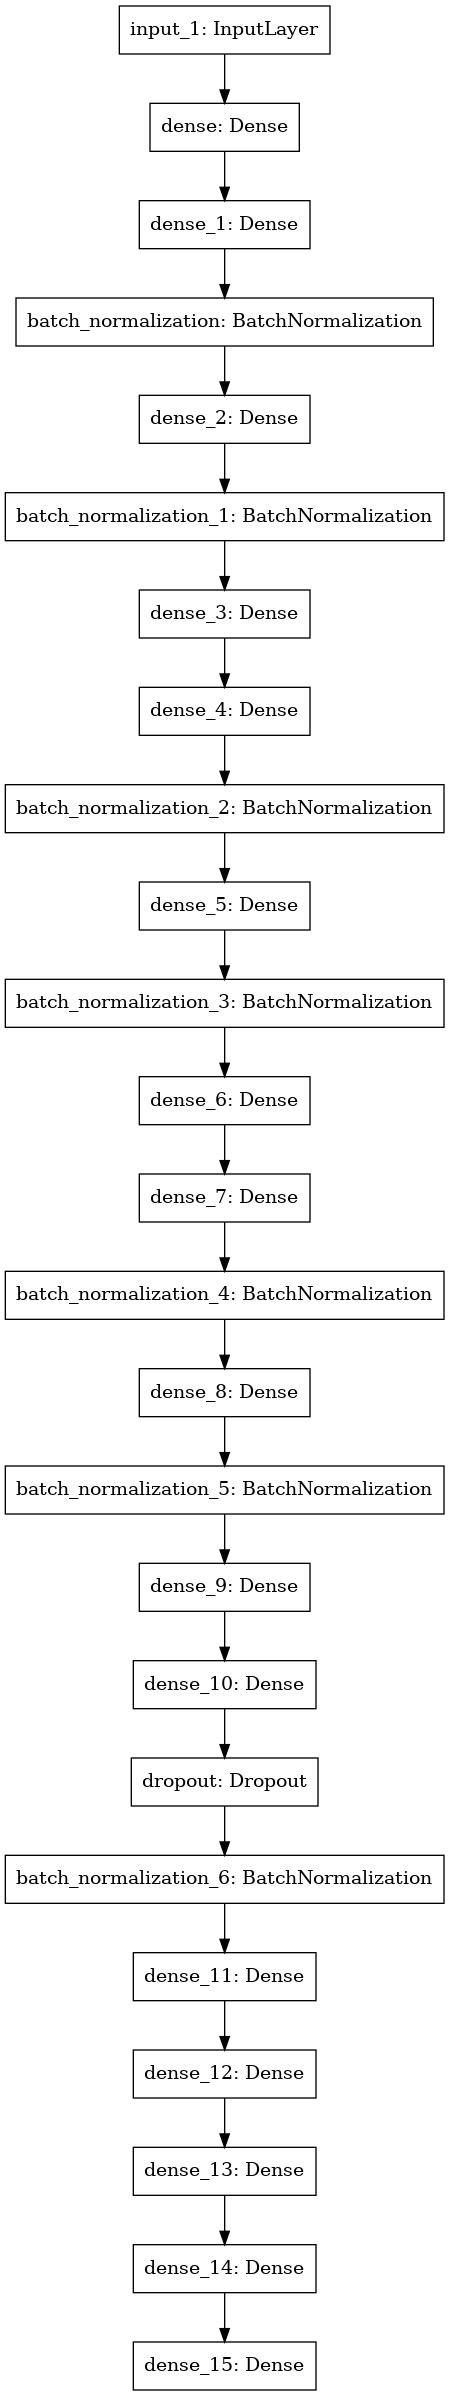

In [6]:
keras.utils.plot_model(model, './model01.png')

In [21]:
EPOCHS = 2000

# The patience parameter is the amount of epochs to check for improvement
early_stop = EarlyStopping(monitor='val_loss', patience=135, mode='min', restore_best_weights=True)

In [23]:
history = model.fit(X_train, y, epochs=EPOCHS,
          verbose=0, validation_split=0.33,
          callbacks=[early_stop, tfdocs.modeling.EpochDots()])
print()
validate(quantize(pd.DataFrame(model.predict(norm_X_test, verbose=0))[0]))

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [90]:
output = pd.DataFrame({'Id': test.Id,
                      'SalePrice': quantize(pd.DataFrame(model.predict(norm_X_test, verbose=0))[0])})
output.to_csv('submissions/submission.csv', index=False)

In [26]:
# Model 02

feature_number = len(X_train.columns)

# Input and feature weighting part
In = Input(shape=(feature_number))
dense21 = Dense(feature_number)(In)
main_feature_dec = Dense(feature_number, activation='softplus')(dense21)

# sub-model 1:
main_dense21 = Dense(512)(main_feature_dec)

# Sub-model 1-1:
dense21_1 = Dense(128)(main_dense21)
dense21_2 = Dense(128, activation='relu')(dense21_1)
bacth21_1 = BatchNormalization()(dense21_2)

# Sub-model 1-2:
dense21_3 = Dense(128)(main_dense21)
dense21_4 = Dense(128, activation='relu')(dense21_3)
bacth21_2 = BatchNormalization()(dense21_4)

# Sub-model 1-3:
dense21_5 = Dense(128)(main_dense21)
dense21_6 = Dense(128, activation='relu')(dense21_5)
bacth21_3 = BatchNormalization()(dense21_6)

# Interaction parts of sub-model 1
mid_dense21_1 = Dense(256)(Concatenate()([bacth21_1, bacth21_2]))
mid_dense21_2 = Dense(256)(bacth21_3)

mid_dense_combo = BatchNormalization()(Dense(500)(Concatenate()([mid_dense21_1, mid_dense21_2])))

Addition = Concatenate()([bacth21_1, bacth21_2, bacth21_3])

# Prediciton of sub-model 1
pred1 = Dense(1)(Concatenate()([Addition, mid_dense_combo]))

# Sub model 2:
dense22 = Dense(100)(main_feature_dec)

feature_dec2_1 = Dense(feature_number, activation='softmax')(dense22)
dense_feat2_1 = Dense(512)(feature_dec2_1)
feature_dec2_2 = Dense(feature_number, activation='softmax')(dense22)
dense_feat2_2 = Dense(512)(feature_dec2_2)
feature_dec2_3 = Dense(feature_number, activation='softmax')(dense22)
dense_feat2_3 = Dense(512)(feature_dec2_3)

# Precition 2:
sum_of_features = Add()([feature_dec2_1, feature_dec2_2, feature_dec2_3])
pred2 = Dense(100, activation='relu')(sum_of_features)
pred2 = BatchNormalization()(Dense(500)(pred2))
pred2 = Dense(1)(pred2)

features_combo = Concatenate()([dense_feat2_1, dense_feat2_2, dense_feat2_3])
# one layer
mid_dense22_1 = Dense(100)( features_combo)
# two layers
mid_dense22_2 = Dense(500, activation='relu')(features_combo)
mid_dense22_2 = Dense(100)(mid_dense22_2)
# three layers
mid_dense22_3 = Dense(1000, activation='relu')(features_combo)
mid_dense22_3 = Dense(500, activation='tanh')(mid_dense22_3)
mid_dense22_3 = Dense(100)(mid_dense22_3)
# five layers
mid_dense22_4 = Dense(2000, activation='relu')(features_combo)
mid_dense22_4 = Dense(1000, activation='tanh')(mid_dense22_4)
mid_dense22_4 = Dense(500, activation='relu')(mid_dense22_4)
mid_dense22_4 = Dense(100)(mid_dense22_4)

final_dense22_1 = Concatenate()([mid_dense22_1, mid_dense22_2, mid_dense22_3, mid_dense22_4])
final_dense22_1 = BatchNormalization()(Dense(1000, activation='relu')(final_dense22_1))
final_dense22_1 = BatchNormalization()(Dense(100)(final_dense22_1))
pred3 = Dense(1)(final_dense22_1)

model = Model(inputs=[In], outputs=[pred1, pred2, pred3])

model.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 79)]         0                                            
__________________________________________________________________________________________________
dense_232 (Dense)               (None, 79)           6320        input_15[0][0]                   
__________________________________________________________________________________________________
dense_233 (Dense)               (None, 79)           6320        dense_232[0][0]                  
__________________________________________________________________________________________________
dense_245 (Dense)               (None, 100)          8000        dense_233[0][0]                  
______________________________________________________________________________________

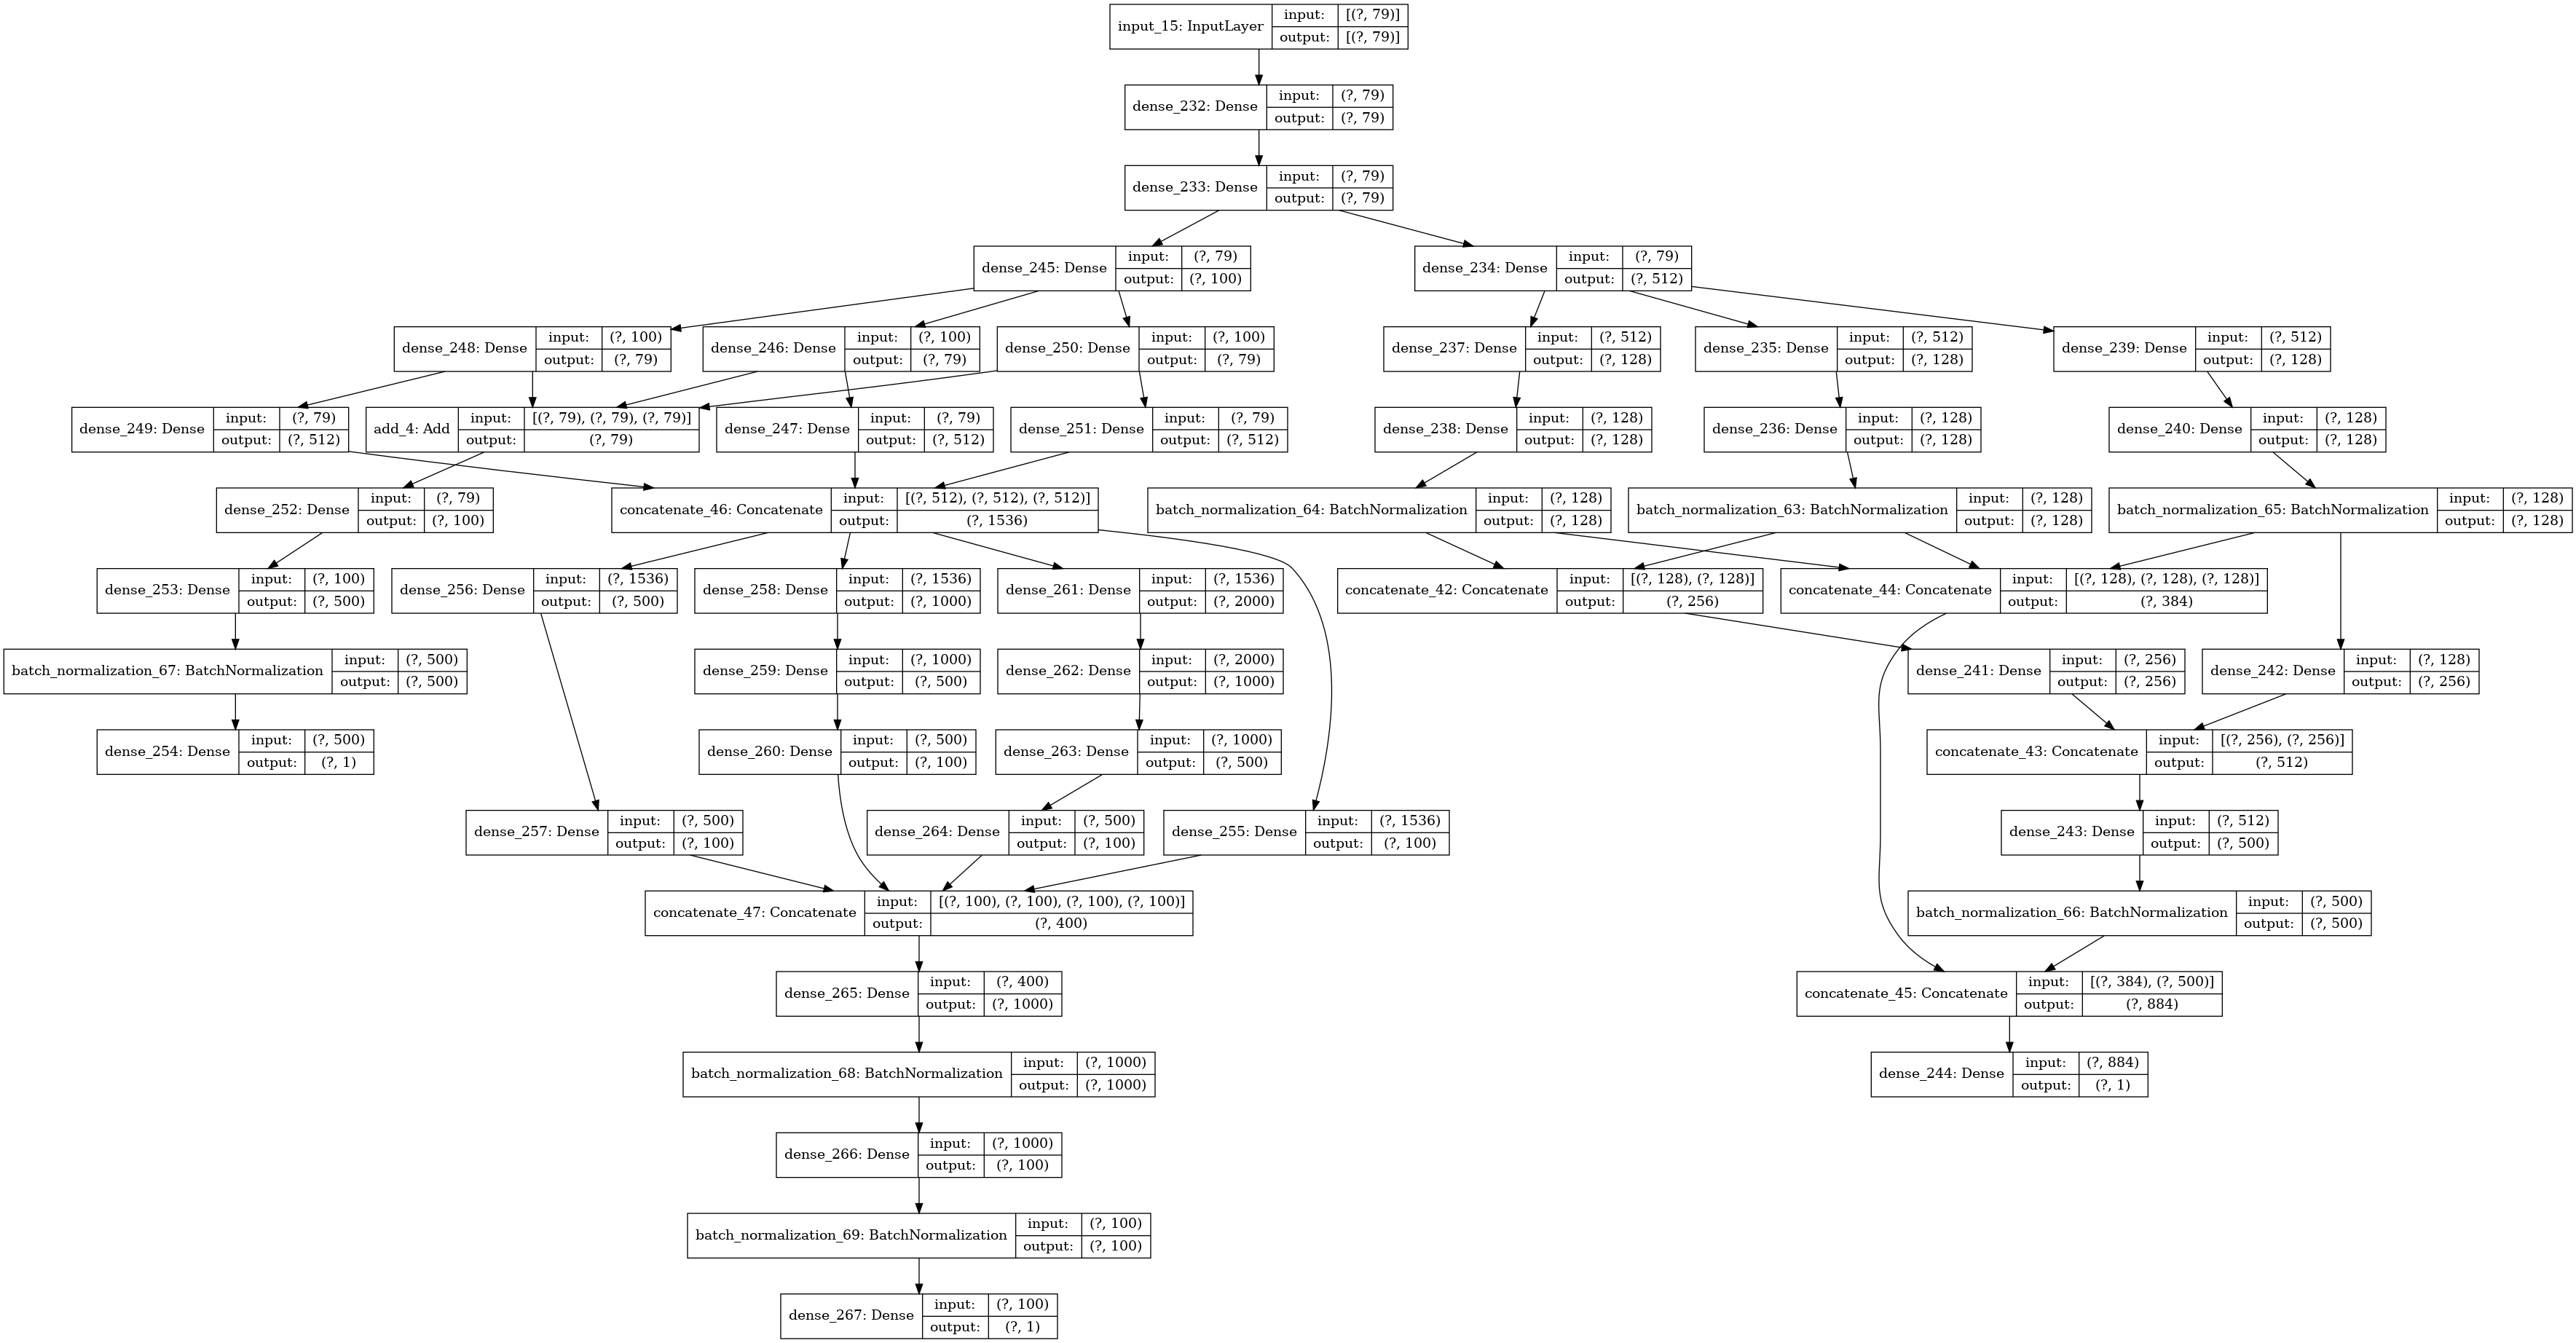

In [27]:
keras.utils.plot_model(model, './model02.png', show_shapes=True)